In [576]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
caminho_2019 = "../dados/obitos-2019.csv"
caminho_2020 = "../dados/obitos-2020.csv"

dados_2019 = pd.read_csv(caminho_2019)
dados_2020 = pd.read_csv(caminho_2020)

print(f"2019 {dados_2019.shape}")
print(f"2020 {dados_2020.shape}")

2019 (12387, 6)
2020 (14958, 6)


In [578]:
dados_2019.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,7
1,AC,OUTRAS,DOMICILIO,< 9,M,15
2,AC,OUTRAS,HOSPITAL,< 9,F,30
3,AC,OUTRAS,HOSPITAL,< 9,M,55
4,AC,OUTRAS,IGNORADO,< 9,M,1


In [580]:
dados_2020.sample(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
7747,PE,INDETERMINADA,HOSPITAL,60 - 69,F,27
2669,SP,OUTRAS,DOMICILIO,20 - 29,F,168
2625,SC,INSUFICIENCIA_RESPIRATORIA,OUTROS_SERVICOS_SAUDE,20 - 29,M,1
3307,MT,PNEUMONIA,IGNORADO,30 - 39,F,4
12625,PE,SEPTICEMIA,HOSPITAL,90 - 99,M,370


In [582]:
print(dados_2019["uf"].unique()) # quantos elementos temos na lista
print(len(dados_2019["uf"].unique())) # temos 27 estados

['AC' 'AL' 'AM' 'AP' 'BA' 'CE' 'DF' 'ES' 'GO' 'MA' 'MG' 'MS' 'MT' 'PA'
 'PB' 'PE' 'PI' 'PR' 'RJ' 'RN' 'RO' 'RR' 'RS' 'SC' 'SE' 'SP' 'TO']
27


In [584]:
dados_2020["tipo_doenca"].unique()

array(['OUTRAS', 'COVID', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG'], dtype=object)

In [586]:
dados_2019["tipo_doenca"].value_counts() # quantos casos temos de cada doenca

OUTRAS                        3847
PNEUMONIA                     2353
INSUFICIENCIA_RESPIRATORIA    2326
SEPTICEMIA                    2065
INDETERMINADA                 1308
SRAG                           487
COVID                            1
Name: tipo_doenca, dtype: int64

In [588]:
dados_2020["tipo_doenca"].value_counts() # quantos casos temos de cada doenca

OUTRAS                        3806
INSUFICIENCIA_RESPIRATORIA    2343
PNEUMONIA                     2217
COVID                         2117
SEPTICEMIA                    2037
INDETERMINADA                 1352
SRAG                          1086
Name: tipo_doenca, dtype: int64

## Desafio 01: Acessar o portal e verificar como sao classificados os dados

## Desafio 2: Corrigir o erro do Thiago na contagem de casos

In [590]:
total_obitos_2019 = dados_2019.groupby('tipo_doenca').sum() # soma o total pq é o único dado numérico
total_obitos_2019

,total
tipo_doenca,
COVID,1
INDETERMINADA,6992
INSUFICIENCIA_RESPIRATORIA,100715
OUTRAS,661509
PNEUMONIA,226432
SEPTICEMIA,175597
SRAG,1498


In [592]:
total_obitos_2020 = dados_2020.groupby('tipo_doenca').sum() # soma o total pq é o único dado numérico
total_obitos_2020

,total
tipo_doenca,
COVID,196132
INDETERMINADA,9735
INSUFICIENCIA_RESPIRATORIA,99204
OUTRAS,692270
PNEUMONIA,182344
SEPTICEMIA,163129
SRAG,16595


Diferenca entre os anos

In [594]:
proporcao = total_obitos_2020 / total_obitos_2019
proporcao

,total
tipo_doenca,
COVID,196132.000000
INDETERMINADA,1.392305
INSUFICIENCIA_RESPIRATORIA,0.984997
OUTRAS,1.046501
PNEUMONIA,0.805293
SEPTICEMIA,0.928997
SRAG,11.078104


## Desafio 03: Explorar outras variáveis da base de dadod

## Grafico comparativo entre 2019 e 2020

In [596]:
total_obitos_2020.loc["SRAG"]

total    16595
Name: SRAG, dtype: int64

In [598]:
def grafico_comparativo(causa):
    total_2019 = dados_2019.groupby("tipo_doenca").sum()
    total_2020 = dados_2020.groupby("tipo_doenca").sum()
    lista =[int(total_2019.loc[causa]), int(total_2020.loc[causa])]
    dados = pd.DataFrame({'Total': lista, 'Ano': [2019, 2020]})

    plt.figure(figsize=(10,8))
    sns.barplot(x = "Ano", y = "Total", data = dados)
    plt.title(f"Óbitos por {causa}")
    plt.show()


    return dados

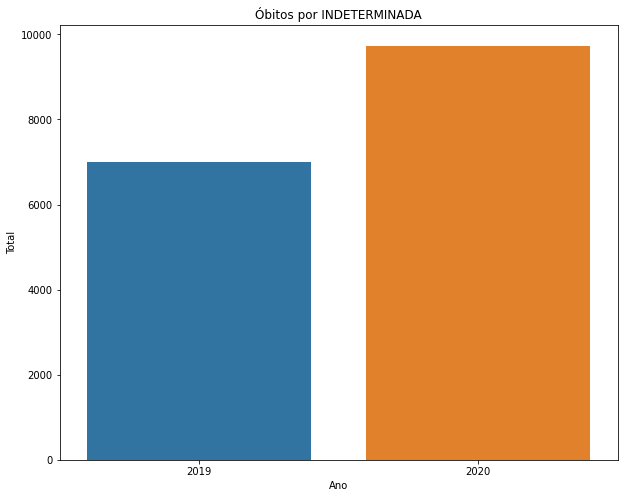

,Total,Ano
0,6992,2019
1,9735,2020


In [600]:
grafico_comparativo("INDETERMINADA")


## Desafio 04: Adicionar na funcao a opcao de filtrar por estado

In [601]:
teste = dados_2019.groupby(["uf", "tipo_doenca"]).sum()
print(teste) # multi-index

teste.loc["SP", "SRAG"] # localizacao dos valores por estados

                               total
uf tipo_doenca                      
AC INDETERMINADA                  37
   INSUFICIENCIA_RESPIRATORIA    219
   OUTRAS                       2003
   PNEUMONIA                     892
   SEPTICEMIA                    420
...                              ...
TO INSUFICIENCIA_RESPIRATORIA    458
   OUTRAS                       3161
   PNEUMONIA                     901
   SEPTICEMIA                    518
   SRAG                            8

[163 rows x 1 columns]


total    293
Name: (SP, SRAG), dtype: int64

In [602]:
def grafico_comparativo(causa, estado):
    total_2019 = dados_2019.groupby(["uf", "tipo_doenca"]).sum()
    total_2020 = dados_2020.groupby(["uf", "tipo_doenca"]).sum()
    lista =[int(total_2019.loc[estado, causa]), int(total_2020.loc[estado, causa])]
    dados = pd.DataFrame({'Total': lista, 'Ano': [2019, 2020]})

    plt.figure(figsize=(10,8))
    sns.barplot(x = "Ano", y = "Total", data = dados)
    plt.title(f"Óbitos por {causa}")
    plt.show()


    return dados

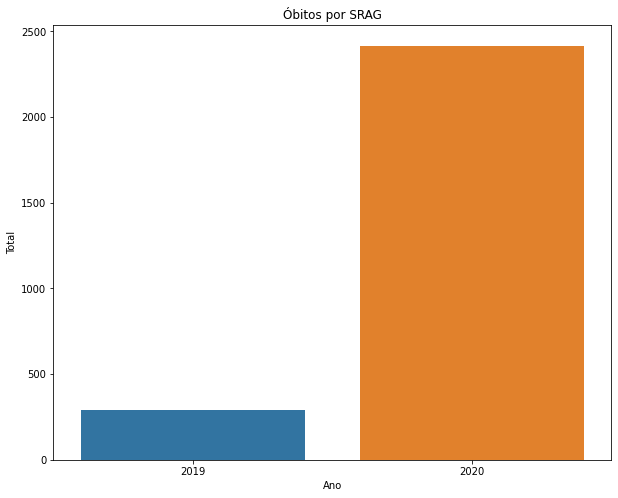

,Total,Ano
0,293,2019
1,2416,2020


In [603]:
grafico_comparativo("SRAG", "SP")

## Adicionar um condicional para visualizar o todo

In [604]:
def grafico_comparativo(causa, estado="BRASIL"):
    if estado == "BRASIL":
        total_2019 = dados_2019.groupby("tipo_doenca").sum()
        total_2020 = dados_2020.groupby("tipo_doenca").sum()
        lista = [int(total_2019.loc[causa]), int(total_2020.loc[causa])]        
    else:
        total_2019 = dados_2019.groupby(["uf", "tipo_doenca"]).sum()
        total_2020 = dados_2020.groupby(["uf", "tipo_doenca"]).sum()
        lista =[int(total_2019.loc[estado, causa]), int(total_2020.loc[estado, causa])]

    dados = pd.DataFrame({'Total': lista, 'Ano': [2019, 2020]})

    plt.figure(figsize=(10,8))
    sns.barplot(x = "Ano", y = "Total", data = dados)
    plt.title(f"Óbitos por {causa} - {estado}")
    plt.show()

    return dados

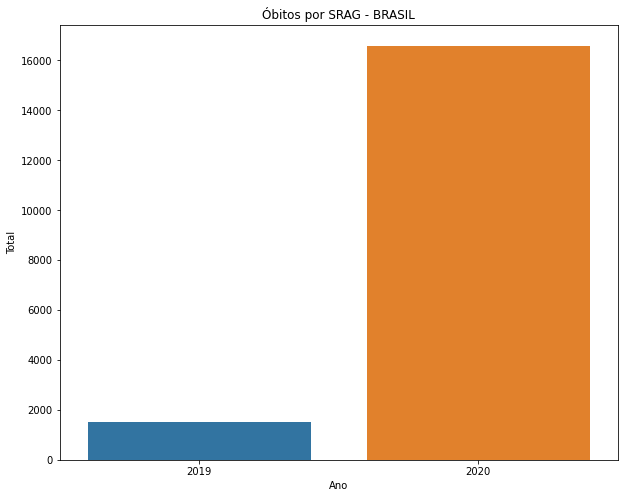

,Total,Ano
0,1498,2019
1,16595,2020


In [605]:
grafico_comparativo("SRAG")

## Desafio 6: ler mais como funciona os protocolos da web

## Desafio 06: melhorar a funcao para aceitar somente o estado (comparativo das doencas)

<AxesSubplot:xlabel='tipo_doenca', ylabel='total'>

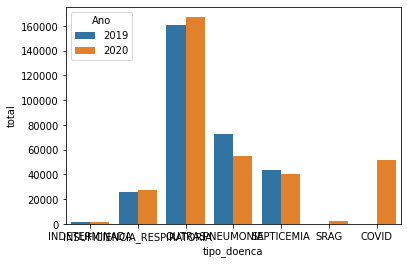

In [606]:
a =dados_2019.groupby(["uf", "tipo_doenca"]).sum()
b =dados_2020.groupby(["uf", "tipo_doenca"]).sum()
a["Ano"]=2019
b["Ano"]=2020
c = pd.concat([a,b])
c.reset_index(inplace=True)
sns.barplot(x = "tipo_doenca", y = "total", data=c[c["uf"]=="SP"], hue="Ano")

<AxesSubplot:xlabel='tipo_doenca', ylabel='total'>

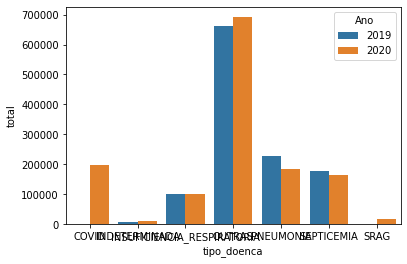

In [607]:
a =dados_2019.groupby(["tipo_doenca"]).sum()
b =dados_2020.groupby(["tipo_doenca"]).sum()
a["Ano"]=2019
b["Ano"]=2020
c = pd.concat([a,b])
c.reset_index(inplace=True)
sns.barplot(x = "tipo_doenca", y = "total", data = c, hue="Ano")

In [608]:
c[c["tipo_doenca"]=="COVID"].head()

,tipo_doenca,total,Ano
0,COVID,1,2019
7,COVID,196132,2020


In [618]:
def grafico_comparativo(causa="TODAS", estado="BRASIL"):
    if estado == "BRASIL":
        total_2019 = dados_2019.groupby("tipo_doenca").sum()
        total_2020 = dados_2020.groupby("tipo_doenca").sum()
        lista = [int(total_2019.loc[causa]), int(total_2020.loc[causa])] 
    elif causa == 'COVID' and not estado == 'MA':
        total_2019 = dados_2019.groupby(["uf", "tipo_doenca"]).sum()
        total_2020 = dados_2020.groupby(["uf", "tipo_doenca"]).sum()
        lista = [0, int(total_2020.loc[estado, causa])]       
    else:
        total_2019 = dados_2019.groupby(["uf", "tipo_doenca"]).sum()
        total_2020 = dados_2020.groupby(["uf", "tipo_doenca"]).sum()
        lista = [int(total_2019.loc[estado, causa]), int(total_2020.loc[estado, causa])]

    if causa == "TODAS":
        total_2019["Ano"]=2019
        total_2020["Ano"]=2020
        dados = pd.concat([total_2019,total_2020])
        dados.reset_index(inplace=True)
        if estado == "BRASIL":
            plt.figure(figsize=(6,4))
            sns.barplot(x = "tipo_doenca", y = "total", data=dados, hue="Ano")
            plt.show()
        else:
            plt.figure(figsize=(6,4))
            sns.barplot(x = "tipo_doenca", y = "total", data=dados[dados["uf"]==estado], hue="Ano")
            plt.show()
    else:
        dados = pd.DataFrame({'Total': lista, 'Ano': [2019, 2020]})
        plt.figure(figsize=(6,4))
        sns.barplot(x = "Ano", y = "Total", data = dados)
        plt.title(f"Óbitos por {causa} - {estado}")
        plt.show()

    return dados

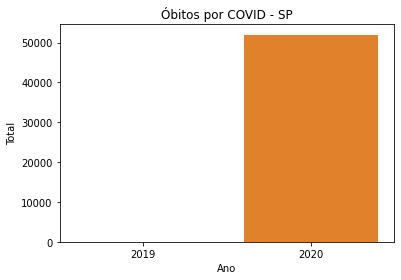

,Total,Ano
0,0,2019
1,51987,2020


In [620]:
grafico_comparativo(causa = "COVID", estado = "SP")

In [495]:
total_2019 = dados_2019.groupby(["uf", "tipo_doenca"]).sum()
total_2020 = dados_2020.groupby(["uf", "tipo_doenca"]).sum()
lista = [int(total_2019.loc[estado, causa]), int(total_2020.loc[estado, causa])]

dados = pd.DataFrame({'Total': lista, 'Ano': [2019, 2020]})
dados

,Total,Ano
0,293,2019
1,2416,2020


# Streamlit: visualizar dados na web sem muitas complicacoes